In [15]:
import urllib
import pandas as pd #dataframes
import seaborn as sns #gráficos
import matplotlib.pyplot as plt
import glob #localizar arquivos

## Carregamento

In [16]:
import glob

extension = 'csv'
# Caminho correto com a pasta e a extensão
all_filenames = glob.glob('/workspaces/Project-Team-01-Samsung-Innovation-Campus-2025/data/*.{}'.format(extension))


In [17]:
df_ouvidoria_aneel = pd.concat([
    pd.read_csv(f, encoding='latin1', sep=';', on_bad_lines='skip') 
    for f in all_filenames
])


# Visão Geral dos Dados

## Estados 

In [8]:
df_ouvidoria_aneel['SigUF'].unique(), len(df_ouvidoria_aneel['SigUF'].unique())

(array(['RO', 'SP', 'MA', 'PR', 'MG', 'AC', 'RS', 'MT', 'AM', 'AP', 'SC',
        'BA', 'RR', 'PB', 'CE', 'PA', 'AL', 'PE', 'TO', 'MS', 'RN', 'RJ',
        'PI', 'ES', 'GO', 'DF', 'SE', nan], dtype=object),
 28)

## Categoria Geral

In [63]:
categorias = df_ouvidoria_aneel['NomCategoria'].unique()
len(df_ouvidoria_aneel['NomCategoria'].unique())
categorias

array(['Informação', 'Reclamações', 'Denúncias', 'Sugestão/Crítica',
       'Elogio', nan], dtype=object)

## Subcategoria

In [55]:
sub_categoria = df_ouvidoria_aneel['NomSubCategoria'].unique(), len(df_ouvidoria_aneel['NomSubCategoria'].unique())
sub_categoria

(array(['Qualidade do Fornecimento', 'Cobranças', 'Faturamento',
        'Serviços Técnicos', 'Serviços Comerciais', 'Outros',
        'Atendimento', 'Denúncias', 'Sugestão/Crítica', 'Elogio', nan],
       dtype=object),
 11)

## Tipologia

In [54]:
tipologias_arr = df_ouvidoria_aneel['NomTipologia'].unique(), len(df_ouvidoria_aneel['NomTipologia'].unique())
tipologias_arr

(array(['Oscilação de Tensão', 'Devol Valores', 'Variação de Consumo',
        'Devol Antecipação Obras', 'Interrup Frequentes',
        'Alteração de carga', 'Falta de Energia', 'Ligação',
        'Suspensão Indevida', 'Fatur Microgeração', 'ANEEL',
        'Cobrança Irregularidades', 'Procedimentos p/ denúncias',
        'Relocação Poste/Rede', 'Participacão Financeira',
        'Conexão Microgeração', 'Atend Presencial', 'Aferição Medidor',
        'Religação', 'Ressarcimento de Danos', 'Cobrança Indevida',
        'Nenhuma das Anteriores', 'Extensão de Rede',
        'Subst Equipamento Rede', 'Class UC', 'Entrega da Fatura',
        'Deslig a Pedido', 'LAI', 'Fatur por Média', 'Poda de Árvore',
        'Poste em Mau Estado', 'Ativ Acessórias', 'Atend Telefônico',
        'Débitos Anteriores', '2ª Via Fatura', 'Dados do Setor Elétrico',
        'Contra a ANEEL', 'Iluminação Pública', 'Atend Digital',
        'Parcelamento', 'Alteração Cadastral', 'Cobranças Diversas',
        'Fisca

## Exploração

In [28]:
df_ouvidoria_aneel = pd.concat([
    pd.read_csv(f, encoding='latin1', sep=';', on_bad_lines='skip') 
    for f in all_filenames
])

df_ouvidoria = df_ouvidoria_aneel.columns.str.lower().str.replace(' ', '_').tolist()
print(df_ouvidoria)
df_ouvidoria_aneel.info()

['datgeracaoconjuntodados', 'sigagente', 'numcpfcnpjagente', 'siguf', 'codigomunicipio', 'nommunicipio', 'nomcategoria', 'nomsubcategoria', 'nomtipologia', 'nomdecisao', 'dscsituacao', 'dtcriacao', 'numqtdreclamacoesdia']
<class 'pandas.core.frame.DataFrame'>
Index: 4800037 entries, 0 to 539864
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DatGeracaoConjuntoDados  object 
 1   SigAgente                object 
 2   NumCPFCNPJAgente         int64  
 3   SigUF                    object 
 4   CodigoMunicipio          float64
 5   NomMunicipio             object 
 6   NomCategoria             object 
 7   NomSubCategoria          object 
 8   NomTipologia             object 
 9   NomDecisao               object 
 10  DscSituacao              object 
 11  DtCriacao                object 
 12  NumQtdReclamacoesDia     int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 512.7+ MB


## 

In [74]:
df_ouvidoria_aneel.isnull().sum().sort_values(ascending=False)


NomMunicipio               151
CodigoMunicipio             70
SigUF                       10
NomCategoria                 8
NomTipologia                 8
NomSubCategoria              6
SigAgente                    0
DatGeracaoConjuntoDados      0
NumCPFCNPJAgente             0
NomDecisao                   0
DscSituacao                  0
DtCriacao                    0
NumQtdReclamacoesDia         0
dtype: int64

In [ ]:
df_ouvidoria_aneel.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DatGeracaoConjuntoDados,4800037,4,2023-01-30,2996102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SigAgente,4800037,118,Cemig,329878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCPFCNPJAgente,4800037.0,NaN,NaN,NaN,16760770544378.65625,18872330433653.566406,1377555000110.0,4895728000180.0,8324196000181.0,15413826000150.0,97578090000134.0
SigUF,4800027,27,SP,1006272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodigoMunicipio,4799967.0,NaN,NaN,NaN,3338718.061153,967376.256735,344.0,2611606.0,3303203.0,3552205.0,5300108.0
NomMunicipio,4799886,10818,São Paulo,124268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NomCategoria,4800029,5,Informação,3451610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NomSubCategoria,4800031,10,Qualidade do Fornecimento,1464499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NomTipologia,4800029,95,Falta de Energia,1071156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NomDecisao,4800037,3,Sem decisão,4268486,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
percent_missing =  df_ouvidoria_aneel.isnull().sum()  / len(df_ouvidoria_aneel)*100
print(percent_missing)

DatGeracaoConjuntoDados    0.000000
SigAgente                  0.000000
NumCPFCNPJAgente           0.000000
SigUF                      0.000208
CodigoMunicipio            0.001458
NomMunicipio               0.003146
NomCategoria               0.000167
NomSubCategoria            0.000125
NomTipologia               0.000167
NomDecisao                 0.000000
DscSituacao                0.000000
DtCriacao                  0.000000
NumQtdReclamacoesDia       0.000000
dtype: float64


In [75]:
count_both_null = (df_ouvidoria_aneel['NomMunicipio'].isnull() & df_ouvidoria_aneel['CodigoMunicipio'].isnull()).sum()
total_rows = len(df_ouvidoria_aneel)
percent_both_null = (count_both_null / total_rows) * 100
print(f"Número de linhas onde são ambos nulos: {count_both_null}")
print(f"Percentual: {percent_both_null:.2f}%")

Número de linhas onde são ambos nulos: 70
Percentual: 0.00%


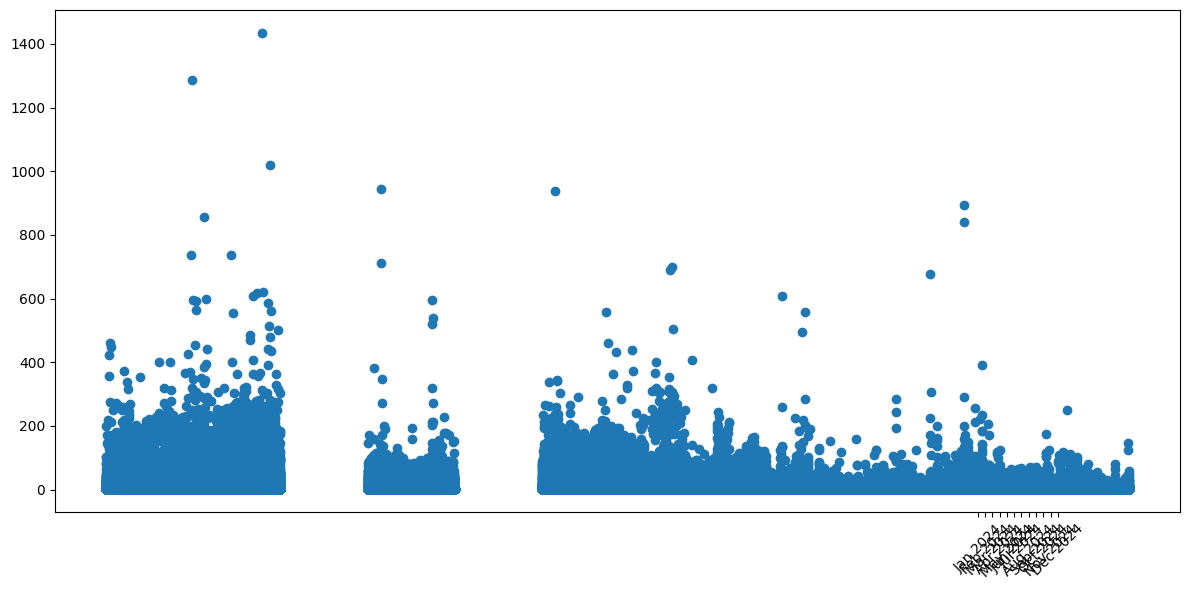

In [ ]:
# Certifique-se de que a coluna está em formato datetime
df_ouvidoria_aneel['DtCriacao'] = pd.to_datetime(df_ouvidoria_aneel['DtCriacao'])

# Crie os ticks para o eixo x
meses = pd.date_range(start='2024-01-01', periods=12, freq='MS')  # Início de cada mês

plt.figure(figsize=(12, 6))
plt.scatter(df_ouvidoria_aneel['DtCriacao'], df_ouvidoria_aneel['NumQtdReclamacoesDia'])
plt.xticks(meses, [d.strftime('%b %Y') for d in meses], rotation=45)
plt.tight_layout()
#plt.ylim((0.0, 10.0))
plt.show()

## Regiões

In [79]:
candidates = ['NomMunicipio', 'NomMunicipioAtendimento', 'Municipio', 'nom_municipio', 'MunicipioAtendimento', 'NomeMunicipio', 'NomMunicipioResidencia']
municipio_col = next((c for c in candidates if c in df_ouvidoria_aneel.columns), None)
if municipio_col is None:
    raise KeyError('Coluna de município não encontrada')
counts = df_ouvidoria_aneel.groupby(municipio_col).size().rename('count')
if 'NumQtdReclamacoesDia' in df_ouvidoria_aneel.columns:
    percentile = df_ouvidoria_aneel.groupby(municipio_col)['NumQtdReclamacoesDia'].quantile(0.95).rename('percentual')
    total = df_ouvidoria_aneel.groupby(municipio_col)['NumQtdReclamacoesDia'].sum().rename('total_reclamacoes')
    mean = df_ouvidoria_aneel.groupby(municipio_col)['NumQtdReclamacoesDia'].mean().rename('media_reclamacoes')
else:
    import numpy as np
    total = pd.Series(0, index=counts.index, name='total_reclamacoes')
    mean = pd.Series(0, index=counts.index, name='media_reclamacoes')
df_stats = pd.concat([counts, total, mean], axis=1)
df_stats['percentual'] = df_stats['count'] / df_stats['count'].sum() * 100
df_stats = df_stats.sort_values('count', ascending=False)
df_stats.head(20)

,count,total_reclamacoes,media_reclamacoes,percentual
NomMunicipio,,,,
São Paulo,124268,861134,6.929652,2.588978
Rio de Janeiro,93979,266805,2.838985,1.957942
Brasília,75095,174575,2.324722,1.564516
Fortaleza,53167,259782,4.886151,1.107672
Salvador,45426,114336,2.516973,0.946397
Porto Alegre,39818,131127,3.293159,0.829561
Goiânia,38313,163744,4.273850,0.798206
Belo Horizonte,36360,68543,1.885121,0.757518
Recife,33732,94208,2.792838,0.702767


## 30 municípios com mais reclamações

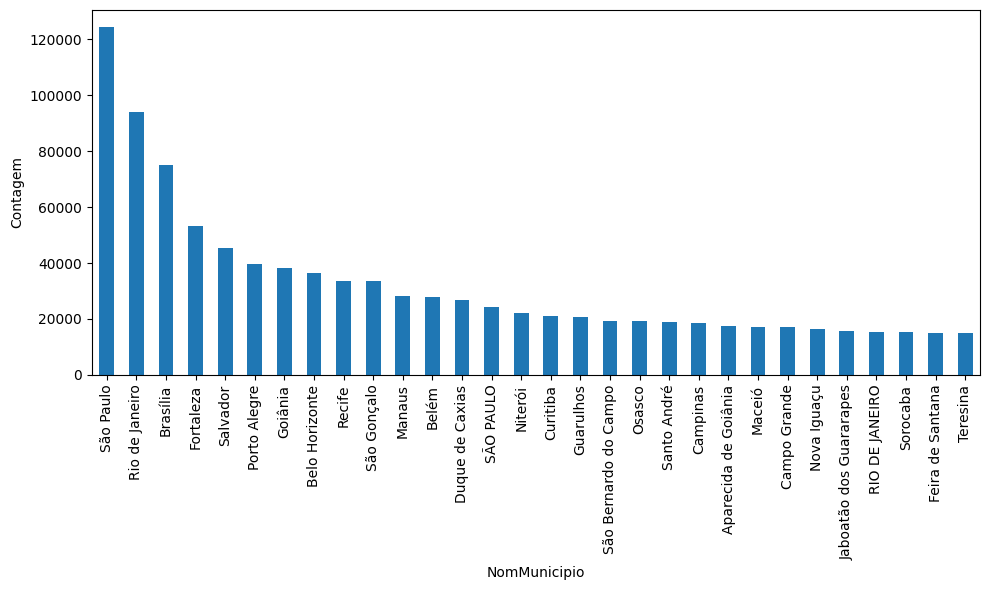

<Figure size 640x480 with 0 Axes>

In [77]:
df_stats.to_csv('/workspaces/Project-Team-01-Samsung-Innovation-Campus-2025/data/municipio_stats.csv', index=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_stats['count'].head(30).plot(kind='bar')
plt.ylabel('Contagem')
plt.xlabel(municipio_col)
plt.tight_layout()
plt.show()
plt.savefig('/workspaces/Project-Team-01-Samsung-Innovation-Campus-2025/data/municipio_reclamacoes.png')

## Categorias

In [81]:
stats_por_categoria = df_ouvidoria_aneel.groupby('NomCategoria')['NumQtdReclamacoesDia'].describe()
stats_por_categoria

,count,mean,std,min,25%,50%,75%,max
NomCategoria,,,,,,,,
Denúncias,7626.0,1.191581,2.587818,1.0,1.0,1.0,1.0,76.0
Elogio,642.0,1.004673,0.068252,1.0,1.0,1.0,1.0,2.0
Informação,3451610.0,1.790206,5.709398,1.0,1.0,1.0,1.0,1435.0
Reclamações,1338675.0,1.317524,1.906704,1.0,1.0,1.0,1.0,385.0
Sugestão/Crítica,1476.0,1.008808,0.093466,1.0,1.0,1.0,1.0,2.0


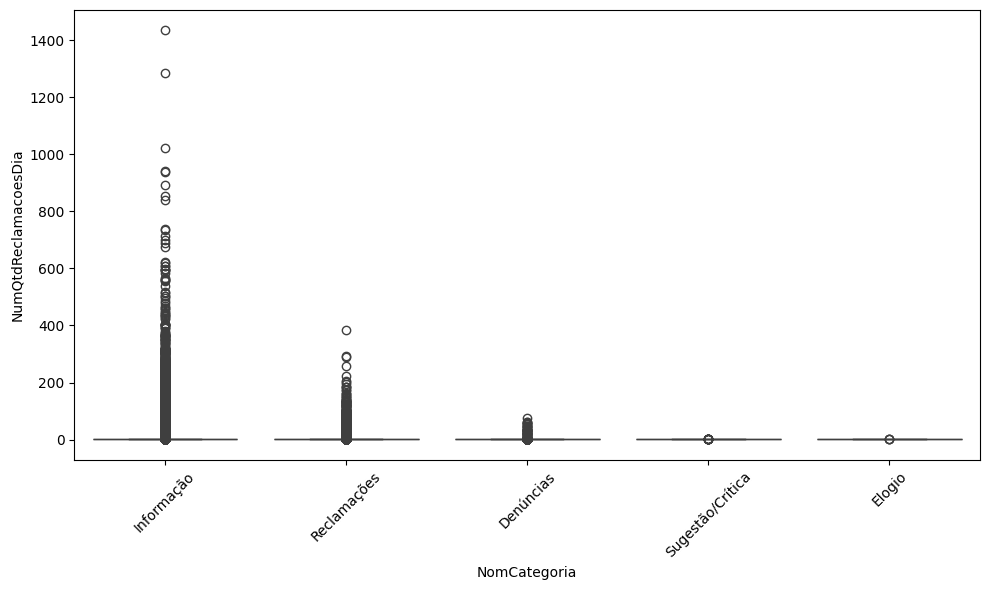

<Figure size 640x480 with 0 Axes>

In [ ]:

df_filtered = df_ouvidoria_aneel.dropna(subset=['NomCategoria'])

plt.figure(figsize=(10,6))
_ = sns.boxplot(x='NomCategoria', y='NumQtdReclamacoesDia', data=df_filtered)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/workspaces/Project-Team-01-Samsung-Innovation-Campus-2025/data/categoria_reclamacoes.png')